***PART 1***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
no_users = len(X)
no_movies = len(X[0])

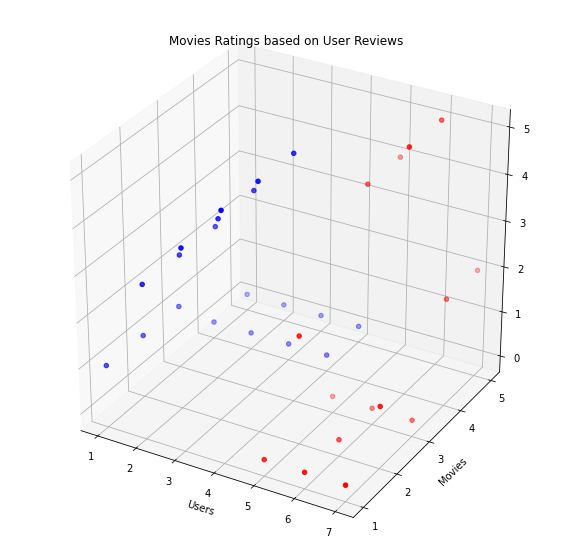

In [ ]:
users =np.array([[j]*no_movies for j in range(1, no_users+1)]).flatten()
movies = np.array([[j] for j in range(1, no_movies+1)]*no_users).flatten()
reviews = X.flatten()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(users[:20],movies[:20],reviews[:20],label="Sci-fi",color="b")
ax.scatter(users[20:],movies[20:],reviews[20:],label="Romance",color="r")

plt.xlabel('Users')
plt.ylabel('Movies')
plt.title("Movies Ratings based on User Reviews")

plt.xticks([0,1,2,3,4,5,6,7])
plt.yticks([1,2,3,4,5])

plt.show()

In [ ]:
dataset_mean = X.mean(axis=0)
normalized = X - dataset_mean

In [ ]:
u,s,v_T = np.linalg.svd(normalized)

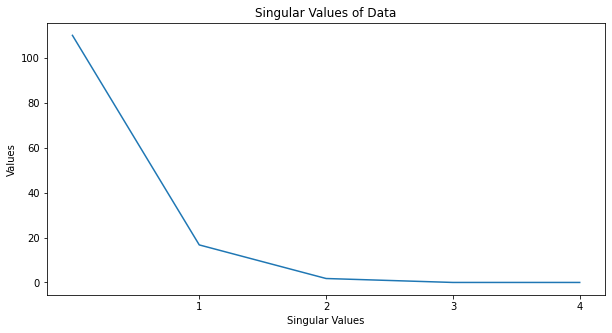

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(s*s)
plt.title('Singular Values of Data')
plt.xlabel('Singular Values')
plt.ylabel('Values')
plt.xticks(ticks=[1,2,3,4])
plt.show()

In [ ]:
k = 2
k_v_T = v_T[:k].T
compX = np.matmul(X,k_v_T)
print("Compressed X: \n")
print(compX)

Compressed X: 

[[ 1.31668354  1.12404854]
 [ 3.95005061  3.37214561]
 [ 5.26673414  4.49619415]
 [ 6.58341768  5.62024268]
 [-2.9000282   5.12064961]
 [-4.55926313  5.36985212]
 [-1.4500141   2.5603248 ]]


Hyperparameter of 2 was chosen as there are two variables that effect the final score.

In [ ]:
XT_X = np.matmul(normalized.T,normalized)
eigen_values,eigen_vectors = np.linalg.eig(XT_X)

In [ ]:
print("Eigen-vectors")
print(np.around(eigen_vectors, decimals=2))
print("Eigen-values")
print(np.around(eigen_values, decimals=2)) 
print("sqrt(Eigen-values)")
print(np.around(np.sqrt(np.abs(eigen_values)), decimals=2))

Eigen-vectors
[[ 0.47  0.36 -0.71  0.39  0.  ]
 [ 0.37  0.41 -0.   -0.83  0.  ]
 [ 0.47  0.36  0.71  0.39 -0.  ]
 [-0.46  0.54  0.    0.06 -0.71]
 [-0.46  0.54  0.    0.06  0.71]]
Eigen-values
[110.09  16.73   0.     1.75   0.  ]
sqrt(Eigen-values)
[10.49  4.09  0.    1.32  0.  ]


***PART 2***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people

In [ ]:
faces_in_wind=fetch_lfw_people(min_faces_per_person=70)
no_images, h, w= faces_in_wind.images.shape
pixels=h*w
X = np.array(faces_in_wind.data)
y = faces_in_wind.target

In [ ]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

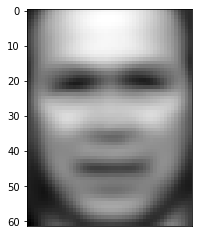

In [ ]:
mean_x = np.mean(X,axis = 0)
mean_x = mean_x[np.newaxis,:]
plt_face(mean_x)
x_normalized = X - mean_x

In [ ]:
u,s,eigen_vectors = np.linalg.svd(x_normalized)
eigen_values = s*s

In [ ]:
print("Top 5 vectors:")
print(eigen_vectors[:5])

print("Top 5 eigen_values:")
print(eigen_values[:5])

print("Associateed attributes")
print(X[3],[eigen_vectors[:5]])

Top 5 vectors:
[[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [ 0.01745991  0.01647563  0.01628433 ... -0.03319881 -0.03265479
  -0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 [ 0.03351924  0.03528838  0.03671131 ...  0.0384081   0.03525075
   0.02920213]
 [ 0.0131453   0.01357961  0.01403794 ... -0.09058423 -0.08371089
  -0.07456545]]
Top 5 eigen_values:
[9.8932755e+08 7.9189370e+08 3.8294509e+08 3.1824365e+08 2.7124675e+08]
Associateed attributes
[13.333333   7.3333335  6.3333335 ... 28.        44.666668  51.333332 ] [array([[ 0.00537343,  0.00569514,  0.00613803, ...,  0.01043273,
         0.00883074,  0.00740469],
       [ 0.01745991,  0.01647563,  0.01628433, ..., -0.03319881,
        -0.03265479, -0.03142723],
       [ 0.01783969,  0.01602544,  0.01488798, ...,  0.03723508,
         0.03316043,  0.03093169],
       [ 0.03351924,  0.03528838,  0.03671131, ...,  0.0384081 ,
         0.03525075,  0.02

The projection of fourth image 4, d=5


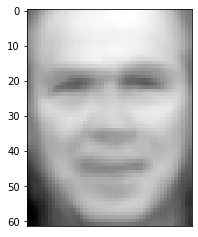

In [ ]:
print("The projection of fourth image 4, d=5")
d5 = np.matmul(X[3],eigen_vectors[:5].T)
d5 = d5[np.newaxis,:]
projection_img4_d5 = np.dot(d5,eigen_vectors[:5])+ mean_x
plt_face(projection_img4_d5)

The projection of image 4, d=50


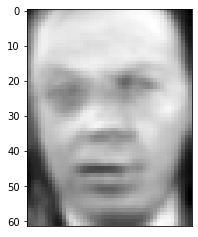

In [ ]:
print("The projection of image 4, d=50")
d50 = np.matmul(X[3],eigen_vectors[:50].T)
d50 = d50[np.newaxis,:]
projection_img4_d50 = np.dot(d50,eigen_vectors[:50])+ mean_x
plt_face(projection_img4_d50)